In [1]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 16.8 MB 5.9 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [Errno 16] Device or resource busy: '.nfs000000002082b5fe000ae33b'

Note: you may need to restart the kernel to use updated packages.


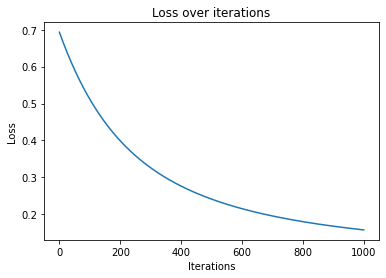

Accuracy: 0.955


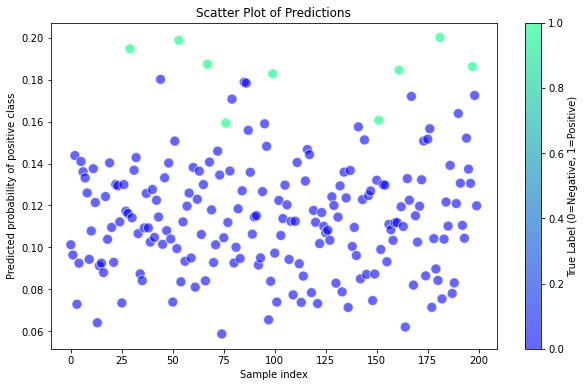

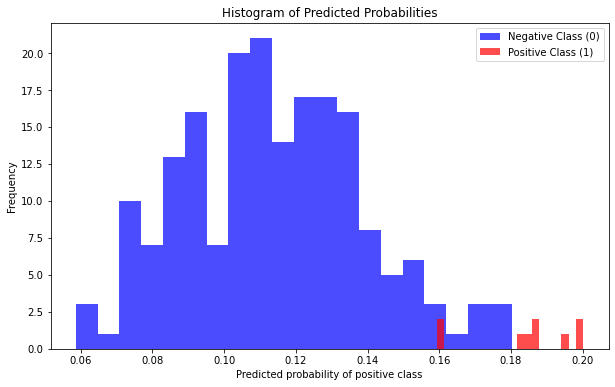

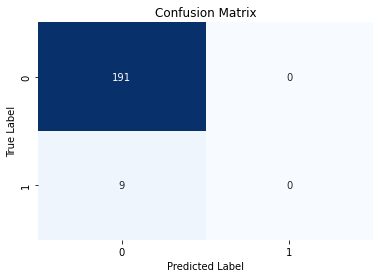

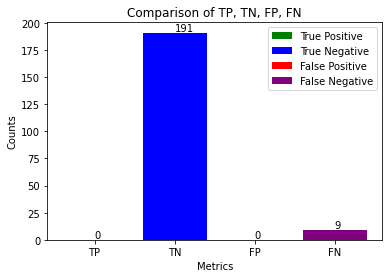

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the dataset
df = pd.read_csv('dataset/health_metrics_dataset.csv')

# Define features and target variable
X = df[['Age', 'BMI', 'Blood_Pressure', 'Cholesterol']].values
y = df['Disease'].values

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute logistic regression loss
def compute_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))

# Logistic regression function
def logistic_regression(X, y, num_iterations, learning_rate):
    m, n = X.shape
    W = np.zeros(n)
    b = 0
    losses = []
    
    for i in range(num_iterations):
        z = np.dot(X, W) + b
        y_pred = sigmoid(z)
        loss = compute_loss(y, y_pred)
        losses.append(loss)
        
        dW = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)
        
        W -= learning_rate * dW
        b -= learning_rate * db
        
    return W, b, losses

# Model training
num_iterations = 1000
learning_rate = 0.01
W, b, losses = logistic_regression(X_train, y_train, num_iterations, learning_rate)

# Plotting the loss over iterations
plt.plot(losses)
plt.title('Loss over iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# Making predictions
z_test = np.dot(X_test, W) + b
y_pred_prob = sigmoid(z_test)
predictions = y_pred_prob >= 0.5

# Model Evaluation
print(f'Accuracy: {accuracy_score(y_test, predictions)}')

# Simple Visualizations
# Scatter plot of predicted probabilities
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_pred_prob, c=y_test, cmap='winter', alpha=0.6, edgecolors='w', s=100)
plt.colorbar(label='True Label (0=Negative, 1=Positive)')
plt.xlabel('Sample index')
plt.ylabel('Predicted probability of positive class')
plt.title('Scatter Plot of Predictions')
plt.show()

# Histogram of predicted probabilities by class
plt.figure(figsize=(10, 6))
plt.hist(y_pred_prob[y_test == 0], bins=20, alpha=0.7, label='Negative Class (0)', color='blue')
plt.hist(y_pred_prob[y_test == 1], bins=20, alpha=0.7, label='Positive Class (1)', color='red')
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.legend()
plt.show()


# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Extracting TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel()

# Visualization of TP, TN, FP, FN
fig, ax = plt.subplots()
ind = np.arange(1, 5)
bars = ax.bar(ind, [tp, tn, fp, fn], color=['green', 'blue', 'red', 'purple'])
ax.set_xlabel('Metrics')
ax.set_ylabel('Counts')
ax.set_title('Comparison of TP, TN, FP, FN')
ax.set_xticks(ind)
ax.set_xticklabels(['TP', 'TN', 'FP', 'FN'])
ax.legend(bars, ['True Positive', 'True Negative', 'False Positive', 'False Negative'])

# Adding the text labels on the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment

plt.show()